# Train Linear SVM Classifier

## Importing Library

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC


# Importing Data from CSV

In [42]:
df = pd.read_csv("./data/week2.csv")
X1 = df.iloc[:, 0]
X2 = df.iloc[:, 1]
Y = df.iloc[:, 2]
X = np.column_stack((X1,X2))
y = np.array(Y)
df.dropna(inplace = True)

# Traing Model and plot

*******************************************
Intercept (Bias) for C=74.41681961944877 : -0.8140357662859846
Coefficient for C=74.41681961944877 : [0.07751872 1.38148943]
Model Accuracy for C=74.41681961944877: 0.7866666666666666
*******************************************
Intercept (Bias) for C=82.42963361685632 : -0.8140486087187347
Coefficient for C=82.42963361685632 : [0.07751993 1.38151611]
Model Accuracy for C=82.42963361685632: 0.7866666666666666
*******************************************
Intercept (Bias) for C=59.26014096314089 : -0.8140019766185163
Coefficient for C=59.26014096314089 : [0.07751552 1.38141922]
Model Accuracy for C=59.26014096314089: 0.7866666666666666
*******************************************
Intercept (Bias) for C=69.49104239043052 : -0.8140264016677925
Coefficient for C=69.49104239043052 : [0.07751783 1.38146997]
Model Accuracy for C=69.49104239043052: 0.7866666666666666
*******************************************
Intercept (Bias) for C=14.21645962022232 : -

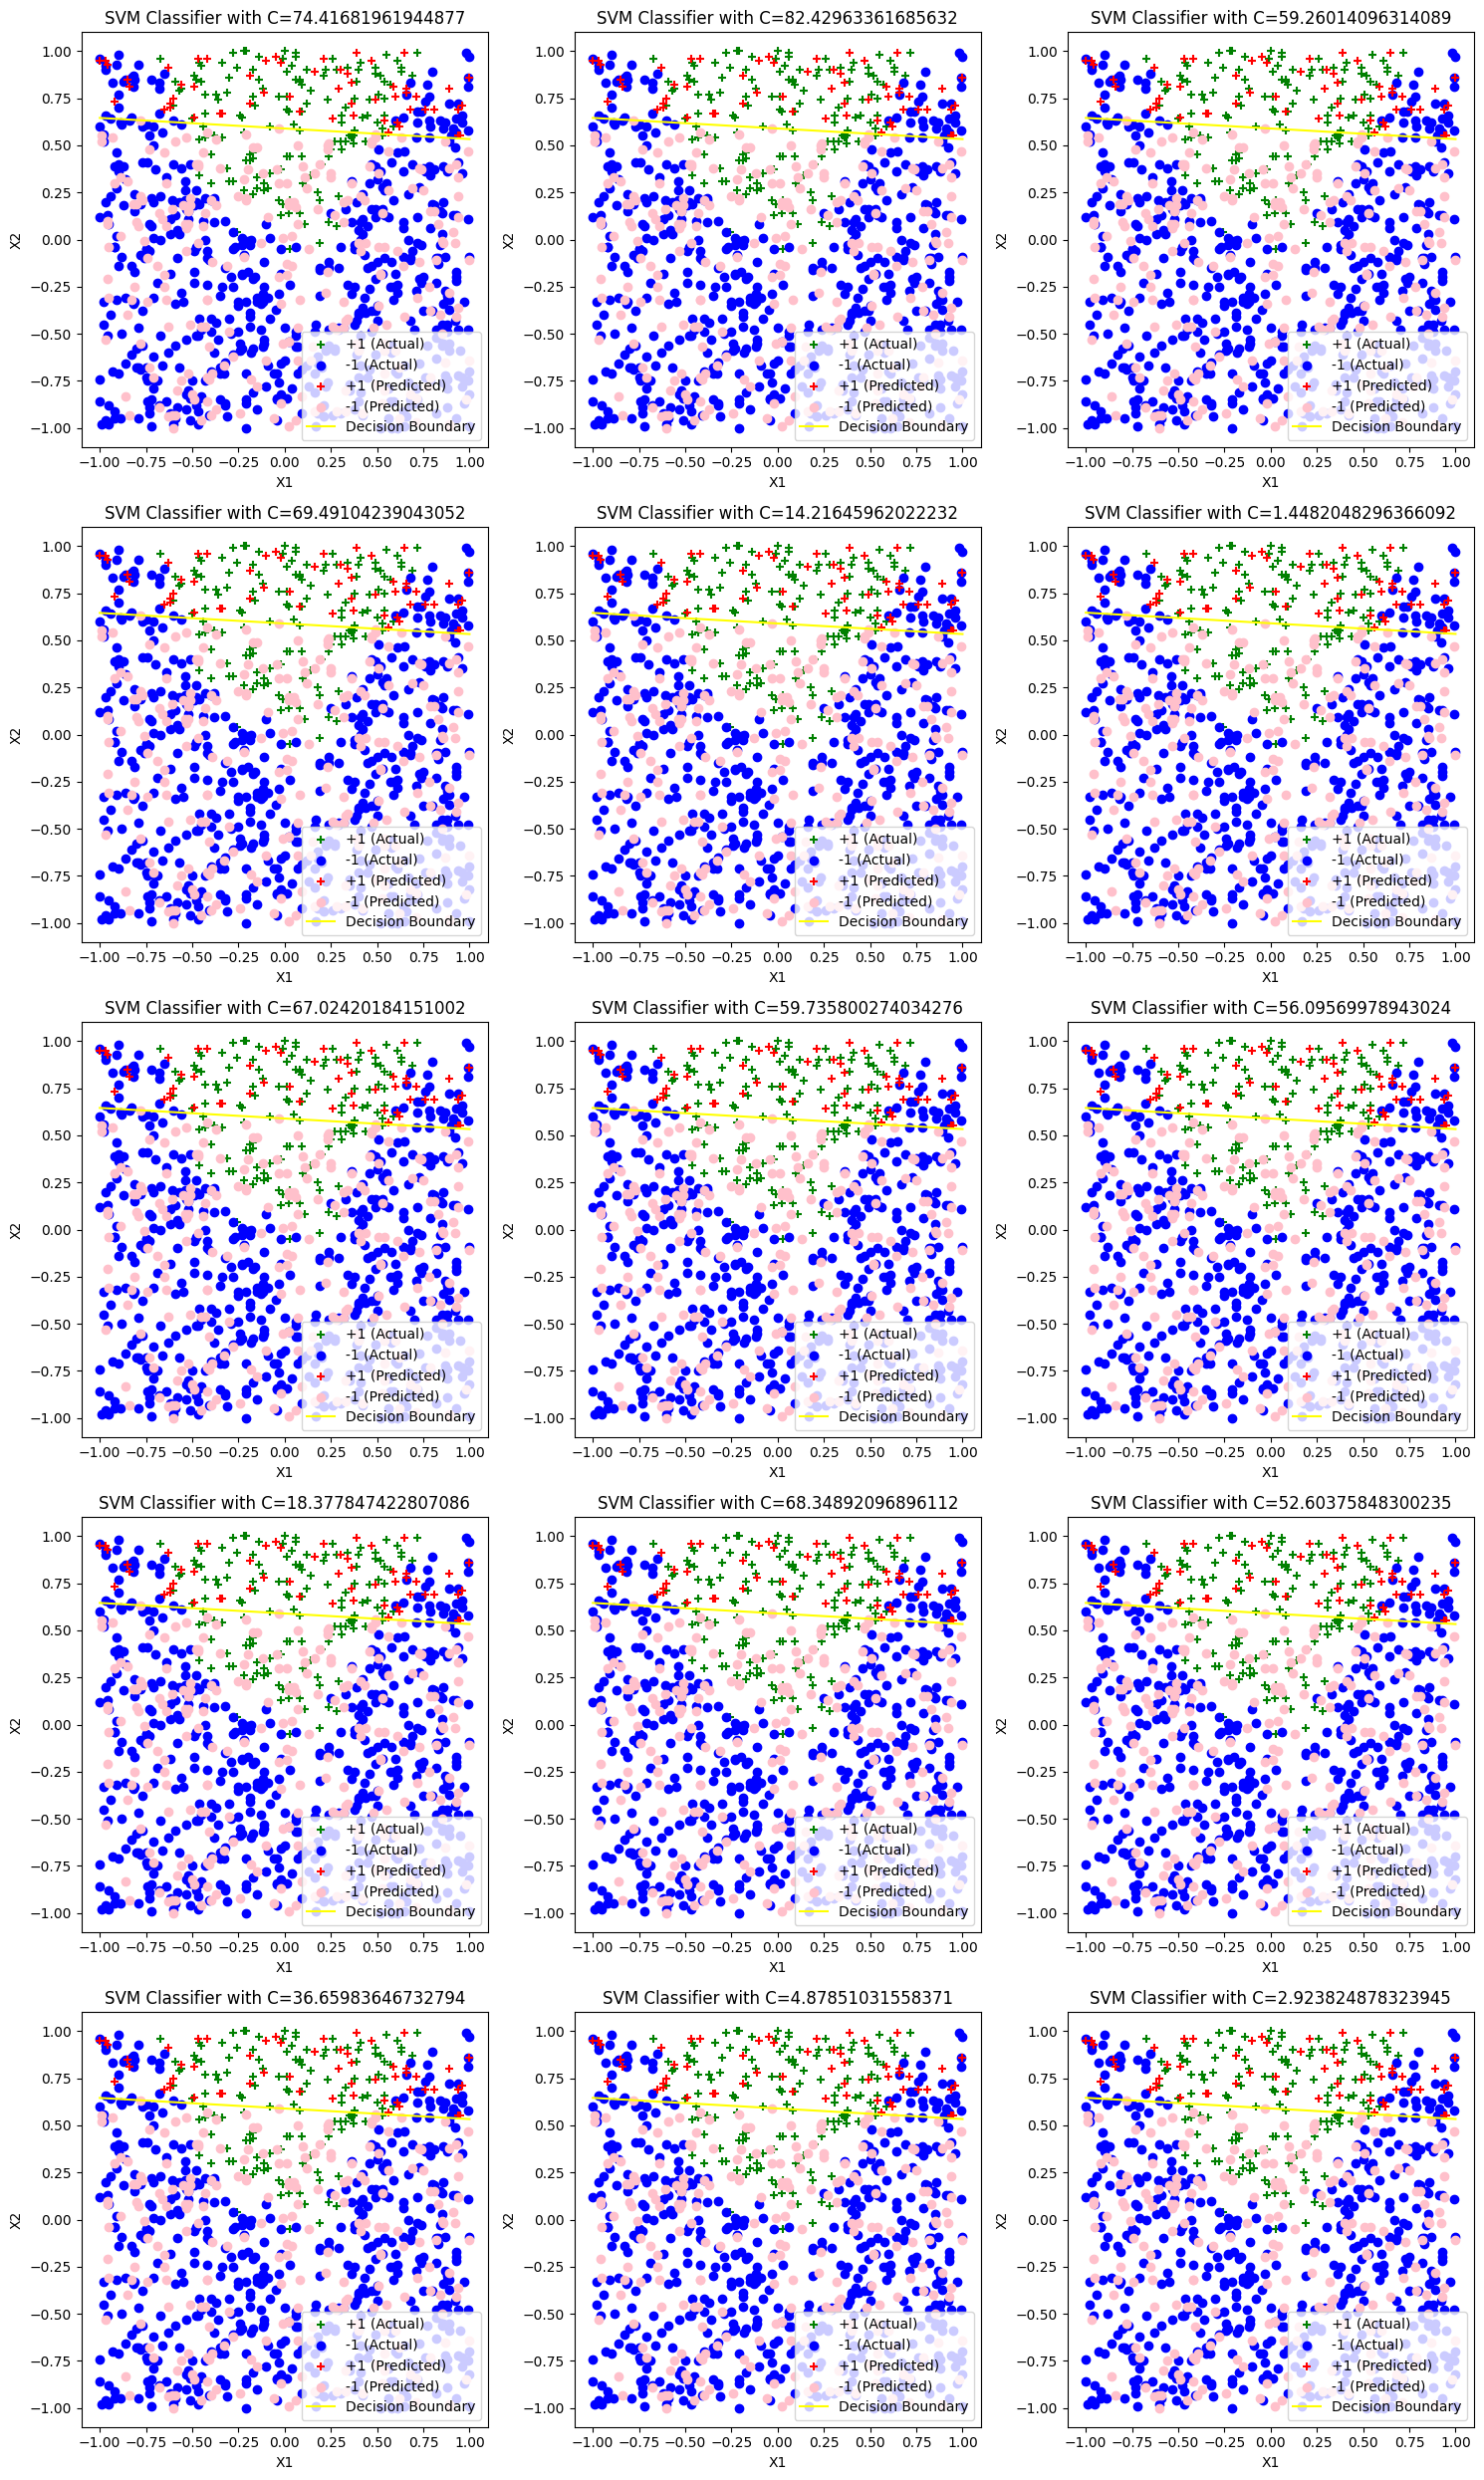

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C = np.random.uniform(0.001, 100, size=15)
n_cols = 3
n_rows = (len(C) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axs = axs.flatten()  # Flatten the 2D array of axes to a 1D array for easier iteration


for i in range(len(C)):
    
    Linear_svc = LinearSVC(C = C[i])
    Linear_svc.fit(X_train, y_train)
    coef = Linear_svc.coef_[0]
    intercept = Linear_svc.intercept_[0]
    accuracy = Linear_svc.score(X_test, y_test)
    print("*******************************************")
    print(f"Intercept (Bias) for C={C[i]} : {intercept}")
    print(f"Coefficient for C={C[i]} : {coef}")
    print(f"Model Accuracy for C={C[i]}: {accuracy}")

    y_pred = Linear_svc.predict(X_test)
    # Plot original data
    positive = [i for i in range(len(y_train)) if y_train[i] == 1]
    negative = [i for i in range(len(y_train)) if y_train[i] == -1]
    axs[i].scatter([X_train[i][0] for i in positive], [X_train[i][1] for i in positive], 
                     marker='+', color='green', label='+1 (Actual)')
    axs[i].scatter([X_train[i][0] for i in negative], [X_train[i][1] for i in negative], 
                     marker='o', color='blue', label='-1 (Actual)')

    # Plot predictions
    positive_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]
    negative_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
    axs[i].scatter([X_test[i][0] for i in positive_pred], [X_test[i][1] for i in positive_pred], 
                     marker='+', color='red', label='+1 (Predicted)')
    axs[i].scatter([X_test[i][0] for i in negative_pred], [X_test[i][1] for i in negative_pred], 
                     marker='o', color='pink', label='-1 (Predicted)')

    x1_vals = np.linspace(min(X1), max(X1), 100)
    x2_vals = - (coef[0] / coef[1]) * x1_vals - (intercept / coef[1])
    axs[i].plot(x1_vals, x2_vals, color='yellow', label='Decision Boundary')
    
    axs[i].set_title(f"SVM Classifier with C={C[i]}")
    axs[i].set_xlabel('X1')
    axs[i].set_ylabel('X2')
    axs[i].legend()

plt.tight_layout()
plt.show()

### (iii) **Impact of Changing `C` on Model Parameters and Predictions:**

- The `C` parameter in a Support Vector Machine (SVM) controls the trade-off between maximizing the margin and minimizing the classification error. Lower values of `C` result in a softer margin, allowing the model to misclassify some points in order to maintain a larger margin. Higher values of `C` enforce a stricter boundary, trying to classify all training points correctly, even if the margin becomes smaller.

#### Observations from Your Results:

- **Intercept (Bias) and Coefficients:**
  - As `C` increases, the **intercept** (`bias`) remains relatively consistent, although there are slight variations. This indicates that the hyperplane's position shifts slightly depending on the strictness of the margin.
  - The **coefficients** (which define the orientation of the decision boundary) show minor variations as well. When `C` is very small (e.g., `C=1.448`), the coefficients change more significantly, indicating a more flexible boundary. As `C` increases (e.g., `C=74.416`), the model becomes more rigid, causing smaller changes in coefficients.

- **Model Accuracy:**
  - Interestingly, in your results, the accuracy remains almost constant (around 0.7867), regardless of the value of `C`. This suggests that your data is not heavily overfitted with larger `C` values or underfitted with smaller `C` values.

#### Impact on Predictions:
- With **smaller `C`** (e.g., `C=1.448`), the SVM allows some misclassifications, as it tries to create a larger margin. This may lead to more generalizable predictions on new data.
- With **larger `C`** (e.g., `C=74.416`), the model will attempt to classify the training data more strictly, potentially overfitting to the training data, but in this case, your accuracy remains steady.

Thus, changing `C` impacts the **rigidity** of the decision boundary and the model's tolerance to misclassification. In your case, a broad range of `C` values leads to very similar results, suggesting that your data is relatively well-separated, and `C` is not heavily influencing performance.

---

### (iv) **Comparison with Logistic Regression Model:**

- **SVM Model:**
  - SVM focuses on maximizing the margin between data points, especially for data that is not linearly separable. It tries to find the optimal hyperplane that best separates the classes with maximum margin.
  - With the introduction of the `C` parameter, SVM balances between achieving a higher margin and correctly classifying the points.

- **Logistic Regression Model:**
  - Logistic regression, on the other hand, estimates probabilities and directly models the likelihood of a class label given the input features. It doesn't explicitly maximize margin but minimizes a loss function based on the predicted probabilities.
  - Logistic regression is typically more interpretable, as its coefficients represent the change in the log-odds of the outcome per unit change in the input feature.

#### Key Differences:
- **Model Parameters:**
  - In **logistic regression**, the coefficients represent the weight of each feature in determining the probability of belonging to a class.
  - In **SVM**, the coefficients determine the orientation of the decision boundary (the hyperplane) that maximizes the margin between classes.

- **Impact on Predictions:**
  - Logistic regression will generally provide **probabilistic** predictions (e.g., the likelihood of belonging to class 1), which can be thresholded at 0.5 for classification.
  - SVM provides **hard classifications** (i.e., a point either belongs to class +1 or -1), without an intrinsic measure of uncertainty or probability unless modified (e.g., using `SVC` with a probability option).

